List all the databases

```sql
show databases
```

Get inside a database for example invoices

```sql
use invoices
```

## Problem

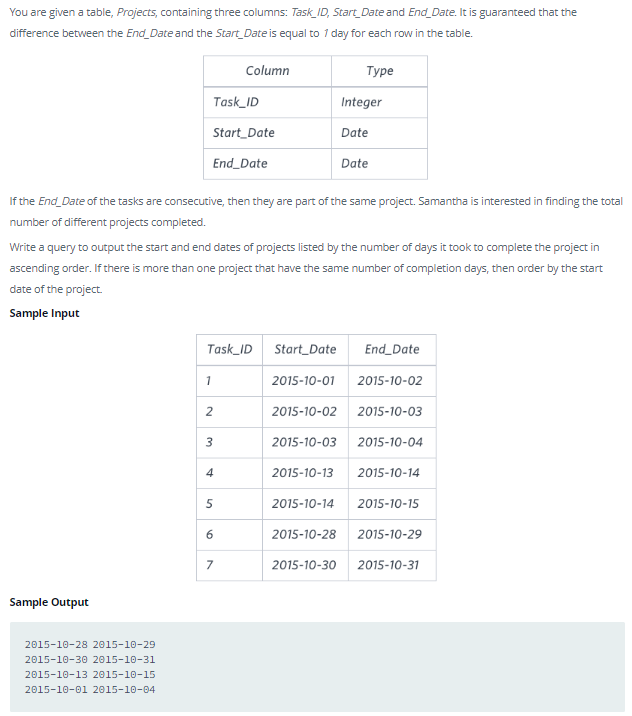

In [3]:
from IPython.display import Image
Image(filename='C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MySQL_Queries\\\imagesfolderfordocuments\\image1.png',
     width = 500)

```mysql
select min_Start_Date, max_End_Date
from
(
select min(Start_Date) as min_Start_Date, max(End_Date) as max_End_Date, count(cumsum) as days
from
( 
select Start_Date, End_Date,
SUM(flag) OVER (ORDER BY Start_Date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cumsum
from 
(
select Start_Date, End_Date, "flag" =
    case when Start_Date <> lag(End_Date,1) over(order by Start_Date) then 1 else 0 end
from projects
) as a
) as b
group by cumsum
) as c
order by days , min_Start_Date;
```

# Problem

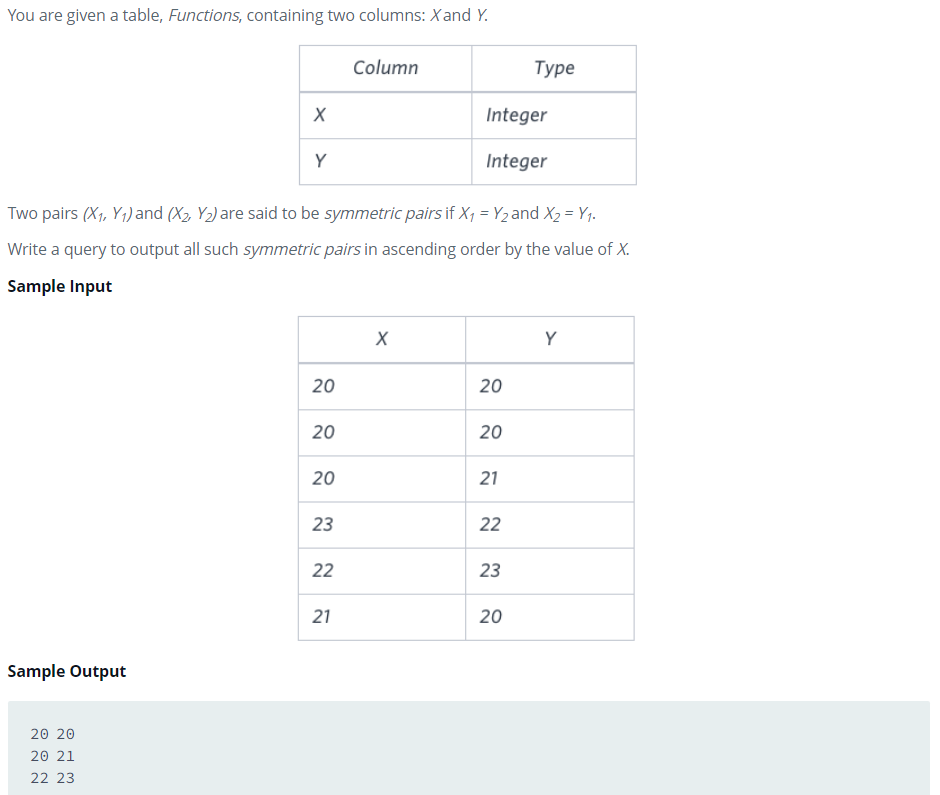

In [12]:
Image(filename='C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MySQL_Queries\\\imagesfolderfordocuments\\image2.png',
     width = 500)

```mysql
select X,Y
from
(
select X, Y, sum_mul,
row_number() over (partition by sum_mul order by X) as rownums
from 
(
select b.X, b.Y, concat(b.X+b.Y,b.X*b.Y) as sum_mul
from (
     select X,Y,concat(X_STR,Y_STR) as concatXY, concat(Y_STR,X_STR) as concatYX
     from    
     (select X, Y, 
     "X_STR" = case when X<10 then concat("0",X) else concat("",X) end,
     "Y_STR" = case when Y<10 then concat("0",Y) else concat("",Y) end
     from Functions) as a
     ) as b
inner join 
     (
     select X,Y,concat(X_STR,Y_STR) as concatXY, concat(Y_STR,X_STR) as concatYX
     from    
     (select X, Y, 
     "X_STR" = case when X<10 then concat("0",X) else concat("",X) end,
     "Y_STR" = case when Y<10 then concat("0",Y) else concat("",Y) end
     from Functions) as a         
     )as c
on b.concatXY = c.concatYX
group by b.X, b.Y
having b.X <> b.Y OR (b.X = b.Y and count(b.concatXY) =4)
) as d
) as e
where rownums =1
order by X
```

# Problem

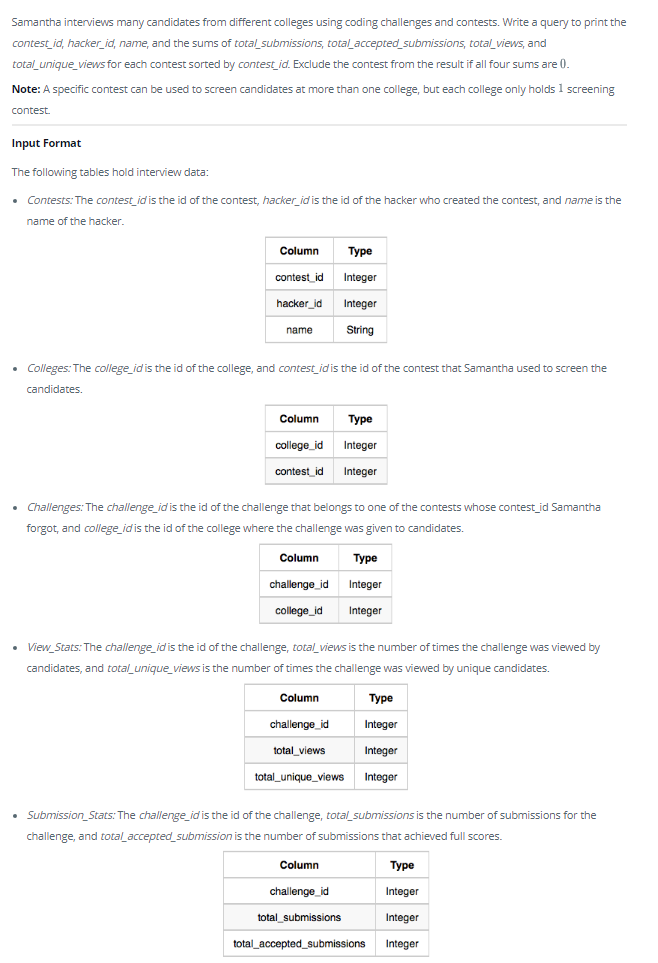

In [4]:
Image(filename='C:\\Users\\Ashlesh B Shetty\\Google Drive\\LaptopOnDrive\\JobSearch\\GitHubRepos\\MySQL_Queries\\\imagesfolderfordocuments\\image3.png',
     width = 500)

```mysql
select contest_id, hacker_id, name, total_submissions, total_accepted_submissions, total_views,total_unique_views
from 
(
select contest_id, hacker_id, name, 
       sum(isnull(total_submissions,0)) as total_submissions,
       sum(isnull(total_accepted_submissions,0)) as total_accepted_submissions,
       sum(isnull(total_views,0)) as total_views,
       sum(isnull(total_unique_views,0)) as total_unique_views
from ( 
select a.contest_id, a.hacker_id, a.name, d.total_views, 
       d.total_unique_views, e.total_submissions,
       e.total_accepted_submissions
from Contests as a
left join Colleges as b on a.contest_id = b.contest_id
left join Challenges as c on b.college_id = c.college_id
left join (select challenge_id , sum(total_views) as total_views,
sum(total_unique_views) as total_unique_views
from View_Stats
group by challenge_id ) as d on c.challenge_id = d.challenge_id
left join (select challenge_id , sum(total_submissions) as total_submissions,
sum(total_accepted_submissions) as total_accepted_submissions
from Submission_Stats 
group by challenge_id ) as e on c.challenge_id = e.challenge_id
) as f
group by contest_id, hacker_id, name
having  sum(isnull(total_submissions,0)) +
        sum(isnull(total_accepted_submissions,0)) +
        sum(isnull(total_views,0)) + 
        sum(isnull(total_unique_views,0)) <> 0
) as g
order by contest_id
```

## Hacker Rank Problem Name: 15 Days of Learning SQL
Good problem to learn SQL window function and Common table expression

```mysql
with submissoins_cte (submission_date, hacker_id, dailysub, uniquehackers, days )
as
(
select submission_date,
       hacker_id,
       row_number() over(partition by submission_date order by tot_daily_submissions desc, hacker_id) as dailysub,
       row_number() over(partition by hacker_id order by submission_date) as uniquehackers,
       day(submission_date) as days
from
( 
select submission_date, 
       hacker_id, 
       count(distinct submission_id) as tot_daily_submissions
from Submissions
group by submission_date, 
         hacker_id
) as a 
)

select a.submission_date,c.unique_hacker ,  a.hacker_id, b.name
from submissoins_cte as a
left join Hackers as b
on a.hacker_id = b.hacker_id
left join 
( 
select submission_date, count(hacker_id) as unique_hacker
from submissoins_cte
where uniquehackers = days
group by submission_date
) as c
on a.submission_date = c.submission_date
where a.dailysub = 1

```

## Facebook Solution for all SQL Interview Questions asked available online

# PART1 Key SQL functions
* select
* select distinct
* where 
* and, or, not
* order by
* select top 5, select top 5 percent

```mysql
SELECT TOP 3 PERCENT * FROM OrderDetails;

SELECT TOP 3 * FROM OrderDetails;
```
* min(), max(), count(), avg(), sum(), 
* group by
* having

* insert into : 'Insert a record'
```mysql
INSERT INTO Customers (CustomerName, ContactName, Address, City, PostalCode, Country)
VALUES ('Cardinal', 'Tom B. Erichsen', 'Skagen 21', 'Stavanger', '4006', 'Norway');
```
* is null, is not null
* update: 'update a record'
```mysql
UPDATE Customers
SET ContactName = 'Alfred Schmidt', City= 'Frankfurt'
WHERE CustomerID = 1;
```
* delete 'delete a record'
```mysql
DELETE FROM Customers
WHERE CustomerName='Alfreds Futterkiste';
```

* union and union all **Appending tables**
    * union
        * The UNION operator selects only distinct values by default. To allow duplicate values, use UNION ALL:
    * union all

```mysql
SELECT City, Country FROM Customers
WHERE Country='Germany'
UNION ALL
SELECT City, Country FROM Suppliers
WHERE Country='Germany'
ORDER BY City;
```

* insert into select **Appending tables with more flexibility**
    * The INSERT INTO SELECT statement copies data from one table and inserts it into another table.
    * INSERT INTO SELECT requires that data types in source and target tables match
    * The existing records in the target table are unaffected
    
```mysql
INSERT INTO Customers (CustomerName, City, Country)
SELECT SupplierName, City, Country 
FROM Suppliers;
```

* like
    * %  The percent sign represents zero, one, or multiple characters
    * _  The underscore represents a single character
    * Note: MS Access uses a question mark (?) instead of the underscore (_).
    * [charlist] - Defines sets and ranges of characters to match
    * [^charlist] or [!charlist] - Defines sets and ranges of characters NOT to match

In MS Access and SQL Server you can also use:
    * [charlist] - Defines sets and ranges of characters to match
    * [^charlist] or [!charlist] - Defines sets and ranges of characters NOT to match

>WHERE CustomerName LIKE 'a%'	# Finds any values that start with "a"  
WHERE CustomerName LIKE '%a'	# Finds any values that end with "a"  
WHERE CustomerName LIKE '%or%'	# Finds any values that have "or" in any position  
WHERE CustomerName LIKE '_r%'	# Finds any values that have "r" in the second position  
WHERE CustomerName LIKE 'a_%_%'	# Finds any values that start with "a" and are at least 3 characters in length  
WHERE ContactName LIKE 'a%o'	# Finds any values that start with "a" and ends with "o"  


The two following SQL statements select all customers with a City NOT starting with "b", "s", or "p":
```mysql
SELECT * FROM Customers
WHERE City LIKE '[!bsp]%';

# The above code is equvivalent to the code below
SELECT * FROM Customers
WHERE City NOT LIKE '[bsp]%';
```

The following SQL statement selects all customers with a City starting with "a", "b", or "c":

```mysql
SELECT * FROM Customers
WHERE City LIKE '[a-c]%';
```

* in
```mysql
SELECT * FROM Customers
WHERE Country IN ('Germany', 'France', 'UK');
```
* between value1 and value2
The BETWEEN operator is inclusive: begin and end values are included. But for text starting is inclusive not ending 

```mysql
# example of between with text
SELECT * FROM Products
WHERE ProductName NOT BETWEEN 'Carnarvon Tigers' AND 'Mozzarella di Giovanni'
ORDER BY ProductName;

# example of between with dates
select * from Submissions 
where submission_date between '2016-03-02' and '2016-03-04'
```

* concat() and CAST( colname AS VARCHAR(16))

```mysql
select cast(submission_id as VARCHAR) + ',' + cast(hacker_id as VARCHAR) as abc
from Submissions 

# OR

select concat(cast(submission_id as VARCHAR), ',', cast(hacker_id as VARCHAR)) as abc
from Submissions 


# casting to integer, charachter and date
SELECT CAST(25.65 AS int);
SELECT CAST(25.65 AS varchar);
SELECT CAST('2017-08-25' AS datetime);
```

* join
    - (INNER) JOIN: Returns records that have matching values in both tables
    - LEFT (OUTER) JOIN: Return all records from the left table, and the matched records from the right table
    - RIGHT (OUTER) JOIN: Return all records from the right table, and the matched records from the left table
    - FULL (OUTER) JOIN: Return all records when there is a match in either left or right table

* Exists  
https://www.quora.com/What-is-the-difference-between-EXISTS-and-IN-operators-in-SQL

    * Difference between in and exists
        * IN:

            * Works on List result set
            * Doesn’t work on subqueries resulting in Virtual tables with multiple columns
            * Compares every value in the result list
            * Performance is comparatively SLOW for larger resultset of subquery
            * Caution when subquery results NULL: when a subquery returns a NULL value then the whole statement becomes NULL. In that cases we are using the EXITS keyword
        * EXISTS:

            * Works on Virtual tables
            * Is used with co-related queries
            * Exists comparison when match is found
            * Performance is comparatively FAST for larger resultset of subquery

```mysql
select hacker_id, name
from Hackers 
where exists 
( select * 
 from Submissions
 where Hackers.hacker_id = hacker_id
       and score = 100)
```

* **in** : it is preferred when checking equal to for a list of values, slow for subquery resulting a lot of rows
* **exists** : it is preferred for correlated subqueries and subqueries that result a lot of rows, faster in such cases
* **any** : it is like OR. used with an operator >,<,>=,<=,= 
* **all** : it is like AND used with an operator >,<,>=,<=,=  

```mysql
# exists
select hacker_id, name from Hackers  
where exists 
( select * 
 from Submissions
 where Hackers.hacker_id = hacker_id
       and score = 100)

# in : same as above code with exists
select hacker_id, name from Hackers 
where hacker_id in
( select hacker_id
 from Submissions
 where score = 100)
       
# any
SELECT * FROM customers 
WHERE Age > ALL( SELECT Age FROM customers WHERE Salary > 5000)
# all
SELECT * FROM customers 
WHERE Age > ANY( SELECT Age FROM customers WHERE Salary > 5000)
```
 

* commenting 

```mysql

-- single line commenting

/*
Multiline
commenting
*/

select hacker_id --,name
from Hackers 


select /*hacker_id,*/ name
from Hackers 
``` 

* isnull(colname, default_value)

```mysql
SELECT ProductName, UnitPrice * (UnitsInStock + ISNULL(UnitsOnOrder, 0))
FROM Products
```

* select into
    * The SELECT INTO statement copies data from one table into a **new table**.

```mysql
SELECT * INTO CustomersBackup2017 IN 'Backup.mdb'
FROM Customers;
```

# PART2 : SQL Database

* CREATE DATABASE database_name;
* DROP DATABASE database_name;
* CREATE TABLE 

```mysql
-- create table from another table
create table table name as
select * 
from table_name

-- create new table from scratch
CREATE TABLE Persons (
    PersonID int,
    LastName varchar(255),
    FirstName varchar(255),
    Address varchar(255),
    City varchar(255) 
);
```

* DROP TABLE table_name;
    * The following SQL statement drops the existing table "Shippers":
* DROP TABLE IF EXISTS table_name;
    * drop table will throw error if table doesnot exists
    * so DROP TABLE IF EXISTS is used for error handling
* TRUNCATE TABLE table_name;
    * Does not delete the table but will remove all the data from the table

* ALTER TABLE
    * ALTER COLUMN columnname
    * ADD colunmname
    * DROP COLUMN columnname

```mysql

-- Add
ALTER TABLE Persons
ADD DateOfBirth date;

-- Drop column
ALTER TABLE Persons
DROP COLUMN DateOfBirth date;

-- Alter Column
ALTER TABLE Persons
DROP COLUMN DateOfBirth date;

```

* Constraints
    * Constraints can be specified when the table is created with the CREATE TABLE statement, or after the table is created with the ALTER TABLE statement
    * Constraints can be column level or table level. Column level constraints apply to a column, and table level constraints apply to the whole table
    * Commonly used constraints    
        * NOT NULL - Ensures that a column cannot have a NULL value
        * UNIQUE - Ensures that all values in a column are different
        * PRIMARY KEY - A combination of a NOT NULL and UNIQUE. Uniquely identifies each row in a table
        * FOREIGN KEY - Uniquely identifies a row/record in another table
        * CHECK - Ensures that all values in a column satisfies a specific condition
        * DEFAULT - Sets a default value for a column when no value is specified
        * INDEX - Used to create and retrieve data from the database very quickly

* PRIMARY KEY
    * The PRIMARY KEY constraint uniquely identifies each record in a database table.
    * Primary keys must contain UNIQUE values, and cannot contain NULL values.
    * A table can have only one primary key, which may consist of single or multiple fields.

```mysql
-- primary key by defaut has unique key constraints
CREATE TABLE Persons (
    ID int NOT NULL PRIMARY KEY,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255) NOT NULL,
    Age int
);

-- if more than one column is the primary key
CREATE TABLE Persons (
    ID int NOT NULL,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255),
    Age int,    
    CONSTRAINT ID_LastName_PK PRIMARY KEY (ID, LastName)
);

-- unique constraint
CREATE TABLE Persons (
    ID int NOT NULL UNIQUE,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255) NOT NULL,
    Age int
);

-- add and drop primary key on an already existing table
ALTER TABLE Persons
ADD CONSTRAINT ID_LastName_PK PRIMARY KEY (ID, LastName);

ALTER TABLE Persons
DROP CONSTRAINT ID_LastName_PK;
```

* FOREIGN KEY
    * A FOREIGN KEY is a key used to link two tables together.
    * A FOREIGN KEY is a field (or collection of fields) in one table that refers to the PRIMARY KEY in another table.
    * The table containing the foreign key is called the child table, and the table containing the candidate key is called the referenced or parent table.
    * In below example Persons table is the Parent table, Orders table is child table
        
```mysql

-- create child table and Foreign key referncing primary key in Parent table
CREATE TABLE Persons(
    PersonsID int NOT NULL,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255),                 
    Adress varchar(300),
    CONSTRAINT PersonsID_PK PRIMARY KEY (PersonsID)                 
    );

CREATE TABLE Orders(
    OrdreID varchar(255) NOT NULL,
    OrderDate date,                 
    PersonsID int NOT NULL,
    CONSTRAINT OrderID_PK PRIMARY KEY (OrdreID)
    CONSTRAINT PersonsID_FK FOREIGN KEY (PersonsID) REFERENCES Persons(PersonsID)
    );

-- Add and Drop Foreign key from an existing table
ALTER TABLE ORDERS
ADD CONSTRAINT PersonsID_FK FOREIGN KEY (PersonsID) REFERENCES Persons(PersonsID)

ALTER TABLE ORDERS
DROP CONSTRAINT PersonsID_FK

```

* CHECK  

```mysql
CREATE TABLE Persons (
    ID int NOT NULL,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255),
    Age int CHECK (Age>=18)
);

-- CHECK using alter table
ALTER TABLE Persons
ADD CONSTRAINT Age_CHK CHECK (Age >= 18)

ALTER TABLE Persons
DROP CONSTRAINT Age_CHK
```

* DEFAULT

```mysql
-- Default in create table statement
CREATE TABLE Persons (
    ID int NOT NULL,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255),
    Age int,
    City varchar(255) DEFAULT 'Sandnes'
);

-- Default in already created table
ALTER TABLE Persons
ALTER COLUMN City SET DEFAULT 'San Jose';

-- Drop default from a column of a table
ALTER TABLE Persons
ALTER COLUMN City DROP DEFAULT;
```

* Index
    * Indexes are used to retrieve data from the database very fast. The users cannot see the indexes, they are just used to speed up searches/queries.
    
```mysql
-- Create index
CREATE INDEX persons_index
ON Persons(LastName)

-- drop index
DROP INDEX Persons.persons_index ;
```

* Auto increment:
    * T-SQL or Microsoft SQL uses IDENTITY(1,1) for autoincrement
    * In the example below, the starting value for IDENTITY is 1, and it will increment by 1 for each new record

```mysql
CREATE TABLE Persons (
    ID int IDENTITY(1,1) PRIMARY KEY,
    LastName varchar(255) NOT NULL,
    FirstName varchar(255),
    Age int
);
-- So when you insert a row you need not add value to ID it will be auto populated

INSERT INTO Persons (LastName, FirstName, Age)
VALUES ('Shetty', 'Ashlesh', 27)
```

* VIEWS
    * Below step shows how to create, update and drop a view

```mysql
-- create a view
CREATE VIEW [Persons full name] AS
select LastName, FirstName
from Persons

-- update a view
CREATE OR REPLACE VIEW [Persons full Name] AS
select LastName, FirstName
from Persons

-- DROP view
DROP VIEW [Persons full Name] ;
```


* SQL injection:
    * SQL injection is a code injection technique that might destroy your database.
    * SQL injection is one of the most common web hacking techniques.
    * SQL injection is the placement of malicious code in SQL statements, via web page input.
    * To protect a web site from SQL injection, you can use SQL parameters.
    * SQL parameters are values that are added to an SQL query at execution time, in a controlled manner.
    
```mysql
-- ASP.NET Razor Example
txtUserId = getRequestString("UserId");
txtSQL = "SELECT * FROM Users WHERE UserId = @0";
db.Execute(txtSQL,txtUserId);
```

# PART3 : SQL Microsoft Server Functions

## SQL Server String Functions
* ASCII Returns the number code that represents the specific character
* CHAR Returns the ASCII character based on the number code
* NCHAR Returns the Unicode character based on the number code

```mysql
SELECT ASCII('A')
--returns 65

SELECT CHAR(65)
-- returns A

SELECT NCHAR(65)
-- returns A
```
* CHARINDEX Returns the location of a substring in a string
* PATINDEX Returns the location of a pattern in a string

```mysql
SELECT CHARINDEX('s','Ashlesh') -- returns 2
-- by giving position from where  to start searching from
SELECT CHARINDEX('s','Ashlesh', 3) -- returns 6
SELECT PATINDEX('%schools%', 'W3Schools.com'); -- returns 3

```

* CONCAT Concatenates two or more strings together
* Concat with + Concatenates two or more strings together
* DATALENGTH Returns the length of an expression (in bytes) **counts even leading and trailing spaces**
* LEN Returns the length of the specified string **doesnot count trailing spaces**

```mysql
SELECT DATALENGTH('  Ashlesh  ') -- returns 11
SELECT LEN('  Ashlesh  ') -- returns 9
```

* LEFT Extracts a substring from a string (starting from left)
* RIGHT Extracts a substring from a string (starting from right)
* SUBSTRING Extracts a substring from a string

```mysql
SELECT LEFT('Ashlesh',3) -- returns Ash

SELECT SUBSTRING('Ashlesh',3,3) -- returns hle
```

* LOWER Converts a string to lower-case
* LTRIM Removes leading spaces from a string
* RTRIM Removes trailing spaces from a string
* UPPER Converts a string to upper-case
* STR Returns a string representation of a number

* SPACE Returns a string with a specified number of spaces

```mysql
SELECT LEN('ASH' + space(5) +'LESH'); -- returns 12
SELECT LEN('ASH' + space(1) +'LESH'); -- returns 8
```

* REPLACE Replaces a sequence of characters in a string with another set of characters
* STUFF Deletes a sequence of characters from a string and then inserts another sequence of characters into the string, starting at a specified position

```mysql
SELECT REPLACE('Ashlesha', 'A', 'B'); -- returns 'BashleshB'
SELECT STUFF('Ashlesh',3,2,'B'); -- returns 'AsBesh'
```

## SQL Server Numeric Functions
* COUNT Returns the count of an expression
* SUM Returns the summed value of an expression
* MAX Returns the maximum value of an expression
* MIN Returns the minimum value of an expression
* AVG Returns the average value of an expression

* ABS Returns the absolute value of a number
* CEILING Returns the smallest integer value that is greater than or equal to a number
* FLOOR Returns the largest integer value that is equal to or less than a number
* ROUND Returns a number rounded to a certain number of decimal places

```mysql
SELECT ABS(-25.75) AS CeilValue; -- returns 25.75

SELECT CEILING(25.75) AS CeilValue; -- returns 26
SELECT CEILING(-25.75) AS CeilValue; -- returns 25

SELECT FLOOR(25.75) AS CeilValue; -- returns 25
SELECT FLOOR(-25.75) AS CeilValue; -- returns 26

SELECT ROUND(255.756,0,0) AS CeilValue; -- returns 256.000
SELECT ROUND(255.756,0,1) AS CeilValue; -- returns 255.000
SELECT ROUND(255.756,-1,0) AS CeilValue; -- returns 260.000
SELECT ROUND(255.756,-1,1) AS CeilValue; -- returns 250.000
SELECT ROUND(255.756,2,0) AS CeilValue; -- returns 255.760
SELECT ROUND(255.756,2,1) AS CeilValue; -- returns 255.750
```

* SIGN Returns a value indicating the sign of a number
    * If number > 0, it returns 1
    * If number = 0, it returns 0
    * If number < 0, it returns -1

```mysql
select sign(-245.32) -- returns -1.00
select sign(0.00) -- returns .00
select sign(245.32) -- returns 1.00  
```

* RAND Returns a random number or a random number within a range

```mysql
select rand() -- returns random number between 0 and 1
select rand(6) -- returns random number between 0 and 1 with seed 6
```


## SQL Server Date Functions
* DATEADD Returns a date after a certain time/date interval has been added
* DATEDIFF Returns the difference between two date values, based on the interval specified
* DATENAME Returns a specified part of a given date, as a string value
* DATEPART Returns a specified part of a given date, as an integer value
    * Key Intervals available in T-SQL which goes as a parameter in DATEADD, DATEDIFF, DATENAME, DATEPART
        * year, yyyy, yy = Year 
        * quarter, qq, q = Quarter 
        * month, mm, m = month 
        * dayofyear = Day of the year 
        * day, dy, y = Day 
        * week, ww, wk = Week 
        * weekday, dw, w = Weekday 
        * hour, hh = hour 
        * minute, mi, n = Minute 
        * second, ss, s = Second 
        * millisecond, ms = Millisecond 

```mysql
select DATEPART(year, '2018-05-28 16:04:21.140') -- returns integer 2018
select DATENAME(year, '2018-05-28 16:04:21.140') -- returns string 2018
select DATEADD(year, 7, '2018-05-28 16:04:21.140') -- returns '2025-05-28 16:04:21.140'
select DATEDIFF(year, '2018-05-28 16:04:21.140','2025-05-28 16:04:21.140') -- returns 7
```

* CURRENT_TIMESTAMP Returns the current date and time
* GETDATE Returns the current date and time
* GETUTCDATE Returns the current UTC date and time

```mysql
select CURRENT_TIMESTAMP -- returns 2018-05-28 15:58:42.830 
select GETDATE()         -- returns 2018-05-28 16:00:03.237 
select GETUTCDATE();     -- returns 2018-05-28 16:04:21.140 
```


* DAY Returns the day of the month (from 1 to 31) for a given date
* MONTH Returns the month (from 1 to 12) for a given date
* YEAR Returns the year (as a four-digit number) for a given date


## SQL Server Conversion Function
* CAST : CAST(expression AS data_type(length))
* CONVERT: CONVERT(data_type(length), expression, style) : expression style in convert helps in specifying the input data format
```mysql
SELECT CONVERT(date, '25 AUG 2017', 106); -- returns 2017-08-25
SELECT CAST('25 AUG 2017' as DATE); -- returns 2017-08-25
```

# PART4: SQL Servers Operators and Datatypes
* SQL Arithmetic Operators : +, -, *, /, %

* SQL Bitwise Operators : 
    * & : it is AND
    * | : 0|0 = 0, 1|1 = 1, 0|1 = 1, 1|0 = 1 : it is OR (inclusive OR)
    * ^ : 0^0 = 0, 1^1 = 0, 0^1 = 1, 1^0 = 1 : it is XOR (exclusive OR)
* SQL Comparison Operators : =,<,>,>=,<=, <>

* SQL Logical operator : 
    
    * AND TRUE if all the conditions separated by AND is TRUE
    * OR TRUE if any of the conditions separated by OR is TRUE
    * BETWEEN TRUE if the operand is within the range of comparisons
    * NOT Displays a record if the condition(s) is NOT TRUE

    * EXISTS TRUE if the subquery returns one or more records
    * SOME TRUE if any of the subquery values meet the condition
    * ANY  TRUE if any of the subquery values meet the condition
    * ALL TRUE if all of the subquery values meet the condition

    * IN TRUE if the operand is equal to one of a list of expressions
    * LIKE TRUE if the operand matches a pattern

* SQL Compound operator: 
    * += Add equals
    * -= Subtract equals
    * *= Multiply equals
    * /= Divide equals
    * %= Modulo equals
    * &= Bitwise AND equals
    * ^-= Bitwise exclusive equals
    * |*= Bitwise OR equals
    
``` mysql
DECLARE @x1 int = 27; SET @x1 += 2 ; SELECT @x1 AS Added_2; -- returns 29
DECLARE @x2 int = 27; SET @x2 -= 2 ; SELECT @x2 AS Subtracted_2; -- returns 25
DECLARE @x3 int = 27; SET @x3 *= 2 ; SELECT @x3 AS Multiplied_by_2; -- returns 54
DECLARE @x4 int = 27; SET @x4 /= 2 ; SELECT @x4 AS Divided_by_2; -- returns 13
DECLARE @x5 int = 27; SET @x5 %= 2 ; SELECT @x5 AS Modulo_of_27_divided_by_2; -- returns 1
-- bitwise compund operators
DECLARE @x6 int = 10; SET @x6 &= 13 ; SELECT @x6 AS Bitwise_AND; -- returns 8
DECLARE @x7 int = 27; SET @x7 ^= 2 ; SELECT @x7 AS Bitwise_Exclusive_OR;  -- returns 25 
DECLARE @x8 int = 27; SET @x8 |= 2 ; SELECT @x8 AS Bitwise_OR; -- returns 27
```

## SQL Server Data Types
### String Data Types
    * char(n): Fixed width character string
    * varchar(n): Variable width character string
    * varchar(max): Variable width character string
    * text: Variable width character string
    * nchar: Fixed width Unicode string
    * nvarchar: Variable width Unicode string
    * nvarchar(max): Variable width Unicode string
    * ntext: Variable width Unicode string
    * binary(n): Fixed width binary string
    * varbinary: Variable width binary string
    * varbinary(max): Variable width binary string
    * image: Variable width binary string
### Numeric data types
    * bit
    * tinyint
    * smallint
    * int
    * bigint
    * decimal(p,s)
    * numeric(p,s)
    * smallmoney
    * money
    * float(n)
    * real
### Date Data Types
    * datetime
    * datetime2
    * smalldatetime
    * date
    * time
    * datetimeoffset
    * timestamp
### Other Data Types
    * sql_variant: Stores up to 8,000 bytes of data of various data types, except text, ntext, and timestamp
    * uniqueidentifier: Stores a globally unique identifier (GUID)
    * xml: Stores XML formatted data. Maximum 2GB
    * cursor: Stores a reference to a cursor used for database operations
    * table: Stores a result-set for later processing

### PIVOT AND UNPIVOT in TSQL
```mysql
-- UNPIVOT example
CREATE TABLE Login_table_transposed AS
SELECT company_id, login_cnt,
CASE
WHEN login_flag_col = 'login_7_day' THEN '7_day'
ELSE '30_day'
END AS login_flag
FROM Login_table
UNPIVOT
(
login_cnt
FOR login_flag_col IN (login_7_day, login_30_day)
) unpiv;

-- PIVOT example
SELECT company_id, login_7_day, login_30_day
FROM
(
SELECT company_id,login_cnt,
CASE
WHEN login_flag = '7_day' THEN 'login_7_day'
ELSE 'login_30_day'
END AS login_flag_col
FROM Login_table_transposed
) AS A
PIVOT
(
sum(login_cnt)
FOR login_flag_col IN (login_7_day, login_30_day)
) piv;
```

# SQL Questions By WL

## Q1:   
https://www.glassdoor.com/Interview/Data-challenge-was-very-similar-to-the-ads-analysis-challenge-on-the-book-the-collection-of-data-science-takehome-challenge-QTN_1515288.htm  

>You have a table where you have date, user_id, song_id and count. It shows at the end of each day how many times in her history a user has listened to a given song. So count is cumulative sum. 
You have to update this on a daily basis based on a second table that records in real time when a user listens to a given song. Basically, at the end of each day, you go to this second table and pull a count of each user/song combination and then add this count to the first table that has the lifetime count. If it is the first time a user has listened to a given song, you won't have this pair in the lifetime table, so you have to create the pair there and then add the count of the last day. 

Onsite : lots of ads related and machine learning questions. How to build an ad model, how to test it, describe a model. I didn't do well in some of these.

```mysql
select user_id, song_id, sum(count) as count
from 
(select user_id, song_id, count from aggregate_table
 union all
 select user_id, song_id, count from daily_table
 where date = convert(date, getdate())
 ) as A
 group by user_id, song_id
 
 
 ```

## Q2:
Basic Questions
* What are the types of joining in SQL? inner, outer, left and right
* What is windows function? 
  * Aggregate
    * AVG()
    * COUNT()
    * MAX()
    * MIN()
    * SUM()
    * STDEV() : denominator has n-1
    * STDEVP() : denominator has n
    * VAR()
    * VARP()
    
    * CHECKSUM_AGG() 
        * used to detect change in a column 
        * we cannot use aggregation function but we can use distinct and groupby
        * sample syntax: CHECKSUM_AGG ( [ ALL | DISTINCT ] expression ) 
    * COUNT_BIG() : same as count only difference is COUNT_BIG returns bigint COUNT returns int datatype
    * GROUPING() 
    * GROUPING_ID()
    * STRING_AGG()
        * Awesome functions to concatenate strings of row in each group by
        * syntax: STRING_AGG ( expression, separator )
    
  * Ranking
    * DENSE_RANK()
    * RANK()
    * ROW_NUMBER() 
    * NTILE(n) # divides the rows by number of parts that is specified by n

  * Analytic Function
    * FIRST_VALUE()
    * LAG()
    * LAST_VALUE()
    * LEAD() 

    * CUME_DIST()
        * the CUME_DIST of a value in row r is defined as the number of rows with values less than or equal to that value in row r, divided by the number of rows evaluated in the partition or query result set
    * PERCENT_RANK()
        * Rank calculation logic : PERCENT_RANK() = (RANK() - 1) / (Total no of Rows - 1)
    * PERCENTILE_CONT()
        * Calculates a percentile based on a continuous distribution of the column value in SQL Server. The result is interpolated and might not be equal to any of the specific values in the column.
    * PERCENTILE_DISC()
        * For a given percentile value P, PERCENTILE_DISC sorts the values of the expression in the ORDER BY clause and returns the value with the smallest CUME_DIST value (with respect to the same sort specification) that is greater than or equal to P 
        
```mysql
select distinct datepart(weekday,submission_date) as year, 
        PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY  score) OVER(PARTITION BY datepart(weekday,submission_date)) ,
        PERCENTILE_DISC(0.5) WITHIN GROUP(ORDER BY  score) OVER(PARTITION BY datepart(weekday,submission_date)) 
from Submissions
```

### IMPORTANT NOTES ON WINDOW functions
* If ORDER BY is not specified entire partition is used for a window frame. This applies only to functions that do not require ORDER BY clause. 
* If ROWS/RANGE is not specified but ORDER BY is specified, RANGE UNBOUNDED PRECEDING AND CURRENT ROW is used as default for window frame. 
    * This applies only to functions that have can accept optional ROWS/RANGE specification. 
    * Therefore **if you put ORDER BY inside OVER clause for an aggregation function() it becomes cumulative wrt column in order by**
    * For example, ranking functions cannot accept ROWS/RANGE, therefore this window frame is not applied even though ORDER BY is present and ROWS/RANGE is not.
* Limitaitons and restrictions
    * The OVER clause cannot be used with the CHECKSUM aggregate function.
    * RANGE cannot be used with $<unsigned value specification> PRECEDING or <unsigned value specification> FOLLOWING.$
    * Depending on the ranking, aggregate, or analytic function used with the OVER clause, $ <ORDER BY clause> and/or the <ROWS and RANGE clause> $ may not be supported.


```mysql
-- example of a calculated field using window funciton
SELECT SalesOrderID, ProductID, OrderQty  
       ,SUM(OrderQty) OVER(PARTITION BY SalesOrderID) AS Total  
       ,CAST(1. * OrderQty / SUM(OrderQty) OVER(PARTITION BY SalesOrderID)*100 AS DECIMAL(5,2))AS "Percent by ProductID"
FROM Sales.SalesOrderDetail

-- cumulative sum and moving sum with a fixed window
select *, 
       sum(score) over(order by submission_date) as cumulative_sum1,
       sum(score) over(order by submission_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) as cumulative_sum2,
       sum(score) over(order by submission_date ROWS BETWEEN 3 PRECEDING AND CURRENT ROW) as cumulative_sum3
from
( 
select submission_date, sum(score) as score
from Submissions
group by submission_date
) as a
order by submission_date
``` 

### Powerful Reporting Agregrators ROLLUP, CUBE, GROUPING SETS,GROUPING(), GROUPING_ID()
https://www.red-gate.com/simple-talk/sql/t-sql-programming/questions-about-cube-rollup-and-grouping-sets-that-you-were-too-shy-to-ask/  

* ROLLUP()
    * when ROLLUP is used along with GROUP BY we get aggregration at all the colunms used in Group By **HIERARCHIALLY**
    * example: GROUP BY ROLLUP( Country, State, Pincode) : Then we will get result for all the below combinations
        * Country, State, Pincode
        * Country, State
        * Country
        * Overall
* CUBE()
    * when ROLLUP is used along with GROUP BY we get aggregration at all the colunms used in Group By **IN ALL COMBINATIONS**
    * example: GROUP BY CUBE( Country, State, Pincode) : Then we will get result for all the below combinations
        * Country, State, Pincode
        * Country, State
        * Country, Pincode
        * State, Pinocde
        * Country
        * State
        * Pincode
        * Overall
* GROUPING SETS()
    * Complete freedom and super efficient Here we can specify all the levels in which we need the group by 
    * example:
        GROUP BY GROUPING SETS( (Country, State, Pincode), (Country) )

* GROUPING(): Helps in identifying the column that are part of the aggregrated value in each row
* GROUPING_ID(): 
    * Helps in identifying in one shot all the column that are part of the aggregrated value in each row
    * if a row has a value that is aggregrated w.r.t 2nd and 3rd columns of the group by then the resultant colunm will have  ( 2^2 * 0 + 2^1 * 1 + 2^0 * 1 ) = 3 

**Example inclusive of GROUPING SETS(), GROUPING(), GROUPING_ID()** 
```mysql
select datepart(weekday,submission_date) as year, 
       datepart(day, submission_date) as month, 
       sum(score) as score,
       GROUPING(datepart(weekday,submission_date)) as year_grping,
       GROUPING(datepart(day,submission_date)) as day_grping,
       GROUPING_ID(datepart(weekday,submission_date), datepart(day,submission_date)) as year_day_grpingid
from Submissions
group by 
GROUPING SETS(
    (datepart(weekday,submission_date), datepart(day, submission_date)),
    (datepart(weekday,submission_date)),
    (datepart(day,submission_date)),
    ()
    )
order by 1,2
```

*OUTPUT OF ABOVE CODE*

> NULL NULL 57260 1 1 3   
NULL 1 3230 1 0 2   
NULL 2 4390 1 0 2   
NULL 3 3210 1 0 2   
NULL 4 4530 1 0 2   
NULL 5 4105 1 0 2   
NULL 6 5610 1 0 2   
NULL 7 3705 1 0 2   
NULL 8 4180 1 0 2   
NULL 9 4720 1 0 2   
NULL 10 2560 1 0 2   
NULL 11 4995 1 0 2   
NULL 12 2945 1 0 2   
NULL 13 2390 1 0 2   
NULL 14 4470 1 0 2   
NULL 15 2220 1 0 2   
1 NULL 8000 0 1 1   
1 6 5610 0 0 0   
1 13 2390 0 0 0   
2 NULL 8175 0 1 1   
2 7 3705 0 0 0   
2 14 4470 0 0 0   
3 NULL 9630 0 1 1   
3 1 3230 0 0 0   
3 8 4180 0 0 0   
3 15 2220 0 0 0   
4 NULL 9110 0 1 1   
4 2 4390 0 0 0   
4 9 4720 0 0 0   
5 NULL 5770 0 1 1   
5 3 3210 0 0 0   
5 10 2560 0 0 0   
6 NULL 9525 0 1 1   
6 4 4530 0 0 0   
6 11 4995 0 0 0   
7 NULL 7050 0 1 1   
7 5 4105 0 0 0   
7 12 2945 0 0 0   

* EXAMPLE OF ROLLUP() 
    * when this is used next to GROUP BY we get aggregration at every level of columns used in groupby at one shot
```mysql
select datepart(weekday,submission_date) as wkday, 
       datepart(day, submission_date) as dayy, 
       sum(score) as score
from Submissions
group by datepart(weekday,submission_date), 
       datepart(day, submission_date)
with rollup
order by 1,2
```
Above code gives result at all three levels : (overall),(wkday), (wkday,dayy)  
>    NULL NULL 57260   
    1 NULL 8000   
    1 6 5610   
    1 13 2390   
    2 NULL 8175   
    2 7 3705   
    2 14 4470   
    3 NULL 9630   
    3 1 3230   
    3 8 4180   
    3 15 2220   
    4 NULL 9110   
    4 2 4390   
    4 9 4720    
    5 NULL 5770   
    5 3 3210   
    5 10 2560   
    6 NULL 9525   
    6 4 4530   
    6 11 4995   
    7 NULL 7050   
    7 5 4105   
    7 12 2945  

### Note on Rollup, GROUPING SETS, CUBE
* When you are using CUBE, ROLLUP or GROUPING SETS, you can’t use the DISTINCT keyword in your aggregate expressions, such as  AVG (DISTINCT column_name), COUNT (DISTINCT column_name), and SUM (DISTINCT column_name)
* Random Gyan: Microsoft SQL Server Analysis Services, SSAS,is an online analytical processing (OLAP) and data mining tool in Microsoft SQL Server.
* OLTP stands for online transaction processing
* The CUBE and ROLLUP clauses allow you to even store the row totals, column totals and grand totals without having to do a table, or clustered index, scan of the summary table.
* These are now standard ANSI SQL from 1999, though WITH CUBE and WITH ROLLUP were first introduced by Microsoft.

## Q3
Write a query that identifies all the users that listened to three of the same songs on Spotify, on the same day, as someone in their friend list.  

```mysql

-- My Solution
select a.userid, b.friendid
  from UserSong as a 
 inner join friends as b
    on a.userid = b.userid
 inner join UserSong as c
    on b.friendid = c.userid and a.date = c.date
 group by a.user_id
having count(*) = 3

-- Online Solution
select s1.user_id as user1, s2.user_id as user2
  from songs as s1, friends as f, songs as s2
 where s1.user_id=f.user_id1 
   and s2.user_id=f.user_id2 
   and s1.date=s2.date 
   and s1.song_id=s2.song_id
 group by s1.user_id
having count(*)=3
```

## Q4: Few Good Metrics to measure Facebook ads
* Ad Frequency: Facebook has shown the same ad more than 3 times to the same person.
* Relavance:
* Click Through rate (CTR) Vs. Conversion rate
    * CPA: Cost per action 
    * CPM: Cost per Mille (Cost per thousand impression)
    * CPC: Cost per click
* New leads vs new paying customers
    * check for lead to client conversion rate
* Customer churn
    * Helps in cheking which ads send in wrong message. if not then the customer who took the action will cotinue engaging
* Ad placement performance
* Click by interests : 
    * See what are the interests of the people who are engaging with your ads
* Ad engagement rate 

## Q5
There is a table that tracks every time a user turns a feature on or off, with columns user_id, action ("on" or "off), date, and time.
How many users turned the feature on today?
How many users have ever turned the feature on?
In a table that tracks the status of every user every day, how would you add today's data to it?  

```mysql
-- Part1
SELECT COUNT( DISTINCT user_id)
  FROM TrackerTable
 WHERE action = "on"

-- Part2
SELECT COUNT( DISTINCT user_id)
  FROM TrackerTable
 WHERE date = CONVERT(date , GETDATE()) and action = "on"
 
-- Part3
INSERT INTO ArchiveTable ( Date, user_id, action)
SELECT Date, user_id, action 
  FROM
(
SELECT Date, user_id, action,
       ROW_NUMBER() OVER(PARTITION BY user_id ORDER BY date, time DESC) as rownumbered
  FROM TrackerTable
 WHERE Date = CONVERT(date , GETDATE()) 
)
 WHERE rownumbered = 1
```




## Q6:
A table has a column with full names(e.g. 'Tom Hardin'). write a python code to get distinct first names(i know its super easy in sql)  

In [16]:
# Get unique firsname in python
import pandas as pd

df = pd.DataFrame({ "Names" : ["Ashlesh Shetty", "Sahana PS", "Athrey Billady Shetty","Ashlesh Pai", "Sahana Poonja"]})

df['FirstName'] = df['Names'].map(lambda x: x.split()[0])
df['FirstName'].unique()

array(['Ashlesh', 'Sahana', 'Athrey'], dtype=object)

```mysql
# Get unique firstname in sql
select name, 
       substring(name, 1, CHARINDEX(' ',name) - 1) as firstname,
       substring(name, CHARINDEX(' ',name) + 1, len(name)) as lasttname
from Hackers
``` 

## Q7: 
Given the following tables how would you know who has the most friends  
REQUESTS  
date | sender_id | accepter_id  
ACCEPTED  
accepted_at | accepter_id | sender_id   

```mysql

SELECT user_id
FROM
(
SELECT *, RANK() OVER(ORDER BY FriendsCount DESC) AS rank  
FROM 
(
SELECT user_id, sum(count) as FriendsCount
FROM
(
SELECT sender_id as user_id, count(*) AS count
 FROM ACCEPTED
GROUP BY sender_id

UNION ALL

SELECT accepter_id as user_id, count(*) AS count
  FROM ACCEPTED
 GROUP BY accepter_id
) AS a
GROUP BY user_id 
) AS b
) 
WHERE rank = 1
```

# Q8:
Given an event-level table of interactions between pairs of users (note that there aren't duplicates in one day for one pair of users), for each possible number of "people interacted with" find the count for that group in a given day (i.e. 10 people interacted with only one person, 20 with 2, etc.).

```mysql

SELECT intreactions, count(*) as user_count
(
SELECT user_id, COUNT(*) as intreactions
(
SELECT user_id1 as user_id
  FROM event_level_table
 
UNION ALL

SELECT user_id2 as user_id
  FROM event_level_table
) AS a
GROUP BY user_id
)
GROUP BY intreactions
```

## Q9:
Write a sql query to find out the overall friend acceptance rate for a given date?  
Table :- User_id_who_sent|User_id_to_whom|date|Action (Sent, accepted, rejected etc) 

```mysql

SELECT SUM(CASE WHEN Action = "accepted" THEN 1 END) / SUM(CASE WHEN Action = "Sent" THEN 1 END) as accpetance_rate
  FROM table
 WHERE date = '2018-05-30'
```


## Q10:
A set of values given: Assume table in SQL or list of dictionaries if using Python.
Basically a row of data contained information:
if it is post or it is a comment, row id and some other data.
Find distribution of comments.
#comments # posts
1 5000
2 6787

```mysql

```

## Q11:
Consider a table lifetime_music_actions that for any dt value has all the user-song pairs that have ever existed and the count of listens for each pair. Write a query to update that table for today given that you have it for yesterday and music_actions for today.    
(For a given dt partition, the table has ALL user-song pairs ever recorded up through that day.)The schema will be something like:  
"lifetime_music_actions"  
dt STRING #date  
user_id BIGINT  
song_id BIGINT  
cnt INT  
music_actions logs when a user listens to a song. Its schema is:  
dt STRING # date  
timestamp BIGINT  
user_id BIGINT  
song_id BIGINT  



```mysql

SELECT * 
  FROM lifetime_music_actions
UNION ALL
SELECT dt, user_id, song_id, sum(cnt) as cnt
(
SELECT CONVERT(DATE, GETDATE()) as dt, user_id, song_id, cnt 
  FROM lifetime_music_actions
 WHERE dt = DATEADD(day, -1, CONVERT(DATE, GETDATE())) 
UNION ALL
SELECT CONVERT(DATE, GETDATE()) as dt, user_id, song_id, COUNT(*) as  cnt
  FROM music_actions
 GROUP BY user_id, song_id 
 WHERE dt = CONVERT(DATE, GETDATE())
) AS a

```

## Q12:

### Q12.A: 
* How would you measure the health of Mentions, Facebook's app for celebrities? How can FB determine if it's worth it to keep using it?  If a celebrity starts to use Mentions and begins interacting with their fans more, what part of the increase can be attributed to a celebrity using Mentions, and what part is just a celebrity wanting to get more involved in fan engagement? 

### Q12.B
* If 70% of Facebook users on iOS use Instagram, but only 35% of Facebook users on Android use Instagram, how would you investigate the discrepancy?  

**Answer:  **

- Get data on iOS and Android user interns of:

    - number of users in each age
    - Geo locationns
    - Income
    - Mostly accessed apps
    - Time spent on phone
    - Number of users on iOS and Android

- The age, mostly accessed apps, geolocations, number of users and time spent on phone could tell us a few things:

    - Is there a significant age discrepancies?
    - Are users on iOS and Android focus on different apps?
    - Does iOS users travel more frequently than Android users on average in terms of distances and time?
    - Even the percentage tells iOS has higher %, what about number of users?
    - Time spent on phone: if the 65% Android users and 30% iOS users spend much less time on the phone, that just means these groups of people may not be aware of different apps that are available on their phones

- How the users get the app

    - In what ways do most users on iOS and Android get the app? Through recommendations? Direct download from App store? Or the phone they get come with the apps?
    - If the iOS phones come with the app, or put instagram on top of the list in recommendations, but the Android does not, then that could be the problem.
    - Test recommending apps on both iOS and Android and see response rate.

- Investigate the user feedbacks

    - Is it possible that the user experience for using Instagram on iOS and Android is so different?
    - Or does it simply because running on Instagram on Android devices is a pain in the ass?

### Q12.C.
How do you measure newsfeed health?

Answer:
A superficial answer would be a list of high level metrics, a better answer will do things like normalize answers on a per-user basis (likes/user). Better answers will talk about separate consumption, feedback, driving traffic, reshares, passive vs active engagement, funnel, growth, retention, network &amp; inventory

### Q12.D.
If a PM says that they want to double the number of ads in Newsfeed, how would you figure out if this is a good idea or not?

Answer:
Remember to ensure you mention using an A/B test at some point to find out the impact on users. Look at the impact not just from the ad perspective of CTR, but also from the impact on Facebook users (decreased engagement, increased churn, etc). Think about the overall long term value of this.

### Q12.E.
We have two options for serving ads within Newsfeed:
1 - out of every 25 stories, one will be an ad 
2 - every story has a 4% chance of being an ad 
For each option, what is the expected number of ads shown in 100 news stories?
If we go with option 2, what is the chance a user will be shown only a single ad in 100 stories? What about no ads at all?  

Answer: Both the cases the user will see 4 ads in 100 stories.

Probability of seeingjust one ad in 100 ads
$ C^{100}_1 * (0.04)^1 * (0.96)^{99} $

Probability of seeing no ads in 100 ads

$ (0.96)^{100} $


In [19]:
# Probability of one ad
print(0.96**100)

# Probability of just one ad
print( 100 * 0.96**99 * 0.04**1)

0.016870319358849587
0.07029299732853996


### Q12.F
How do you map nicknames (Pete, Andy, Nick, Rob, etc) to real names?  

Answer: Extract data from various sources and create a statistical approach

### Q12.G
Facebook sees that likes are up 10% year over year, why could this be?   

Answer:
    * 1. Check if it is the number of users or likes per users that are increased year over year. If it is the total number of users that increased by 10% or so, then that could be the reason you have the increase in the likes. If it's not the number of users (or if the growth in the user is not quite close to 10%) then check the following two things.
    * 1-1. Check if there has been a feature update that made it easier and more convenient for the users to click "like" (e.g., change in the size of font/icon as well as its location and etc). If so there could be another feature that could have been de-prioritized due to this change. Check what other impacts it could have caused due to the increase in the likes.
    * 1-2. Check if there has been events that might be the drivers (e.g., number of events, news, posts/shares associated with the news)

### Q12.H
How many high schools that people have listed on their profiles are real? How do we find out, and deploy at scale, a way of finding invalid schools?  

Answer:
    
    * Find from data: Find similar users based on places born, grow up, street names, tags, also their friends. And if in a circle no one or very few people have listed that high school name, it is likely a fake high school. If you need to use an algorithm, us K Nearest Neighbors, find all the similar users with the person with potentially fake high school, then list out and rank of similar users’ high school.

    * Find from available public data: Get a list of high school names (from government or trust worthy organizations) and match high school names.

    * Find from users voting or set up reporting mechanism: People can report scam or down vote fake high school names.

## Q13:
### Q13.A. 
Given 2 tables, one with the phone numbers that facebook sends the confirmation message to and another one with the phone numbers that confirmed the verification, write a sql query to calculate the confirmation percentage. 

```mysql
SELECT ( ((SELECT COUNT(*) FROM phone_confirmed) * 1.0) / (SELECT COUNT(*) FROM send_confirmation)) as ratio
```

### Q13.B
How would you measure the health of facebook group? What metrics and counter metrics would you use?

### Q13.C
How would you measure the performance of a new feature that makes it easier for users to upload videos.

## Q14:
### Q14.A:
Facebook has personal information such as gender and height. If I were to make a claim that men were taller than women, how would you go about proving/disproving this claim?    

Answer:  

Randomly collect a n sample of men and women with each sample of sample size m and calulate average heigh in each sample for n samples of men and n samples of women. So now we have two distribution of heights for men and women now use the t test to see whether there is siginificant difference in the height between two genders

### Q14.B:
What is a Z-test? When would you use a Z test over a T test? 

Answer:

T-test preferred when population SD is not known  **OR** SD is known but the sample size is < 30  
Z-test is used when population standard deviation is known and sample size is > 30

$ T-Score = \frac{x - \mu}{\frac{s}{\sqrt{n}}} $

$ Z-Score = \frac{x - \mu}{\sigma}$

## Q15:
### Q15.A:
given a table of interaction between users (user_a | user_b | day), find number of users who had more than 5 interactions yesterday (assume there is only one unique interaction between a pair of users per day).

Answer: 

```mysql
SELECT user_id
FROM
(
SELECT user_a as user_id
  FROM InteractionTable
UNION ALL
SELECT user_b as user_id
  FROM InteractionTable
)
GROUP BY user_id
HAVING COUNT(*) > 5 
```

### Q15.B:
A user satisfaction survey was conducted for two groups of facebook users (each with 50 k sample size).  
Group1: who had enabled certain login security features    
Group 2: who had not enabled these security features.    
It was found that user satisfaction with group1 was 30% lower than with group 2. Why do you think so? Comment on how the survey was conducted?  

Answer:  
This is an example of selection bias. The subset of users who opted in for the security features are not representative of the underlying population of FB users. They are probably more concerned about how their data is being used.  

Further, because the survey would have been completed on a voluntary basis, it represents another source of selection bias. These individuals are more likely to be engaged with the FB product than the general population, and care enough to complete the survey. Once again, these users are not a representative (or for that matter random) sample from the underlying population of FB users.  

This would explain why Group 1 had a much lower satisfaction rate as compared to Group 2, as they represent a specific subset of FB's users who care deeply about this issue, and by the virtue that they have the security feature on is indicative of the fact that they take data privacy seriously.

## Q16:
Say you notice a surge in average activity among users but  the number of users is down, how would you explain this?  

Answers:  I would look at the following: what type of activity has increased - likes? common? sharing news? if its something like sharing news, I would view the content. Perhaps it is Facebook's data privacy issues where people are deleting FB, but the active users are sharing a lot of news and discussing the news. I would look at demographics - maybe ages 30+ are starting to delete Facebook - "growing out of it"; Geographical - are there certain regions deleting Facebook or being more active?




## Q 17: TO BE SOLVED

### Q17. A:  
programming question was a bit unexpected for doing in 20 mins. Was given a log file of format
id, accepted, id1,id2,id3
id, rejected, id5
id3,request, id6
and was asked to create a network graph from it. I guess the interviewer wanted the result in simply a dictionary , but started with what will be the best data structure to store it, to which i answered bi directional graph and then asked me to code the graph, which got me confused b/w the linked list approach and the normal dictionary approach and ended up taking more time. In midway he said that he understood my approach and moved to machine learning.

### Q17. B:  
In machine learning the questions were between bias variance trade off and PCA . In PCA he went into detail as in what method is used to decompose matrix, what is the significance of first principal component and in the end what is the relationship between the first and second principal component. I got stuck at the relationship between first and second principal component.

## Q18: 
They just wanted to know if you can get the conditional probability calculated correctly  
https://gpuzzles.com/quiz/conditional-probability-questions/

### Q18.A:
tipli and pikli are a married couple. They have two children, one of the child is a boy. Assume safely that the probability of each gender is 1/2.
What is the probability that the other child is also a boy?  
Hint: It is not 1/2 as you would first think.  

Answer:  
